In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as img

In [24]:
M = np.reshape(np.asarray(img.open("treino (1).pgm"),dtype=np.float32)/255,(32256,1))
for i in range(2,2377):
    name = "treino (" + str(i) + ").pgm"
    M = np.hstack((M,np.reshape(np.asarray(img.open(name),dtype=np.float32)/255,(32256,1))))
print(M.shape)

(32256, 2376)


In [25]:
M = M - np.mean(M)
print(M.shape)

(32256, 2376)


In [26]:
u, s, vt = np.linalg.svd(M,full_matrices=False)
print(u.shape)

(32256, 2376)


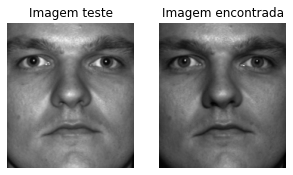

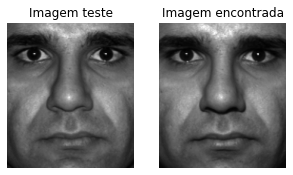

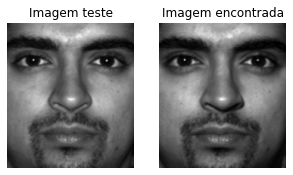

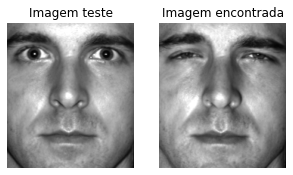

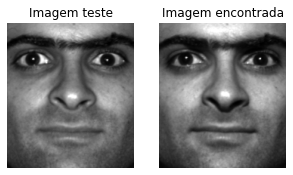

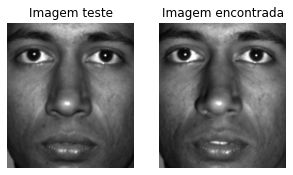

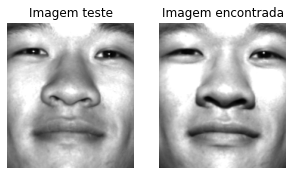

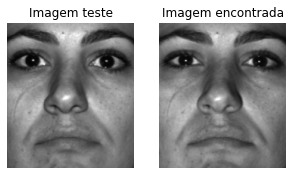

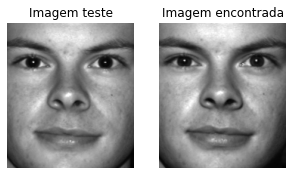

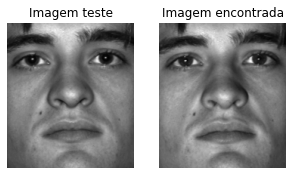

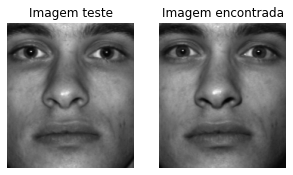

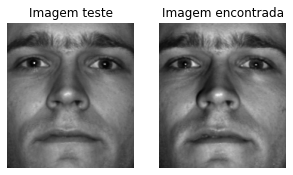

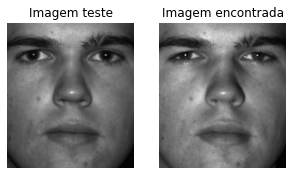

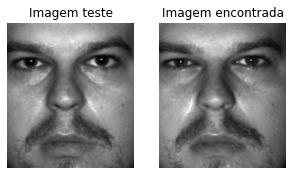

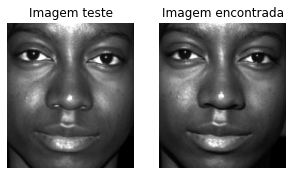

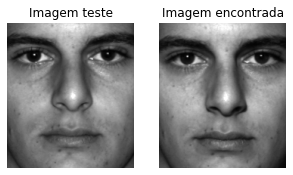

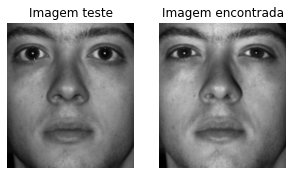

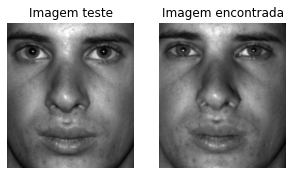

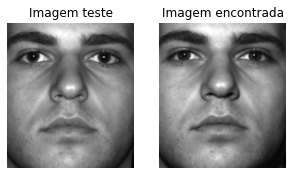

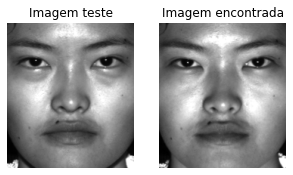

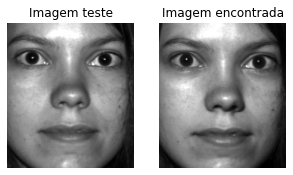

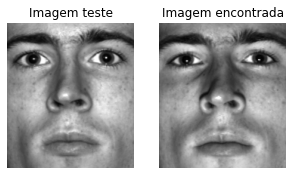

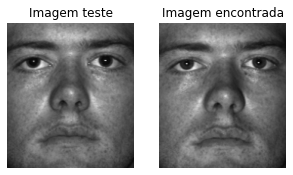

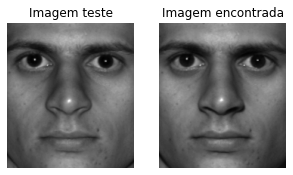

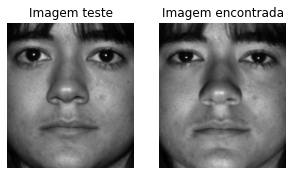

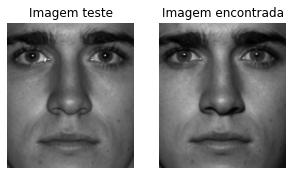

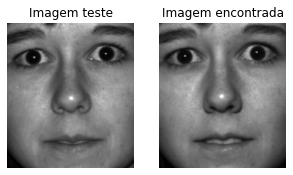

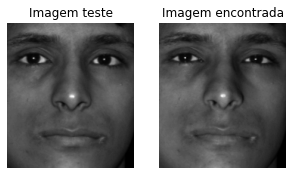

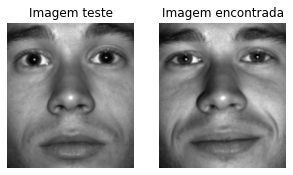

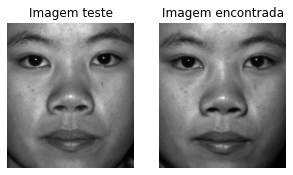

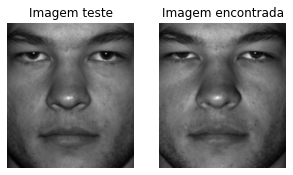

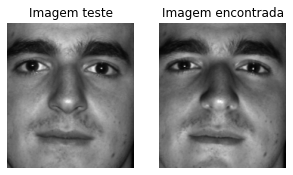

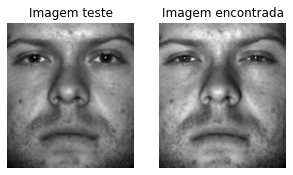

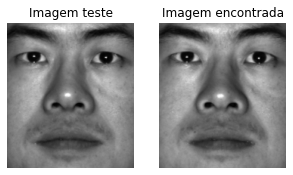

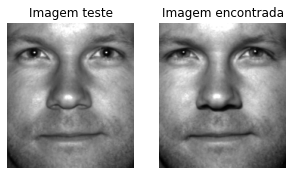

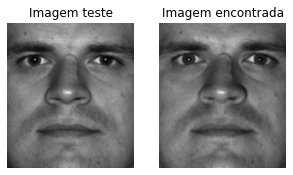

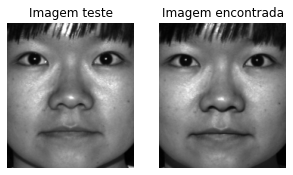

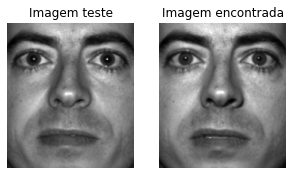

In [37]:
r = 50
for k in range(1,39):
    individuo = "teste (" + str(k) + ").pgm"
    imagemTeste = np.reshape(np.asarray(img.open(individuo),dtype=np.float32)/255,(32256,1))
    imagemTesteProjetada = u[:,0:r].T@imagemTeste
    imagemTesteProjetada = u[:,0:r]@imagemTesteProjetada
    distancia = 500
    index=-1
    for i in range(1,2377):
        name = "treino (" + str(i) + ").pgm"
        imagemAnalisada = np.reshape(np.asarray(img.open(name),dtype=np.float32)/255,(32256,1))
        imagemAnalisadaProjetada = u[:,0:r].T@imagemAnalisada
        imagemAnalisadaProjetada = u[:,0:r]@imagemAnalisadaProjetada
        dist = np.linalg.norm(imagemTesteProjetada-imagemAnalisadaProjetada)
        if dist < distancia:
            distancia = dist
            index = i
    plt.figure(figsize=(5,5))
    plt.subplot(1,2,1)
    plt.imshow(np.reshape(imagemTeste,(192,168)),cmap='gray')
    plt.title("Imagem teste")
    plt.axis("off")
    plt.subplot(1,2,2)
    name = "treino (" + str(index) + ").pgm"
    plt.title("Imagem encontrada")
    plt.imshow(np.asarray(img.open(name),dtype=np.float32)/255,cmap='gray')
    plt.axis("off")
    plt.show()

In [38]:
x = np.array([0])
y = np.array([0])
for i in range(0,2376,10):
    y = np.hstack((y,100*(np.sum(s[0:i])/np.sum(s))))
    x = np.hstack((x,i))
    print("para " + str(i) + " autovetores, variabilidade acumulada de: " + str(100*(np.sum(s[0:i])/np.sum(s))))
print(x)
print(y)

para 0 autovetores, variabilidade acumulada de: 0.0
para 10 autovetores, variabilidade acumulada de: 21.248310804367065
para 20 autovetores, variabilidade acumulada de: 27.282610535621643
para 30 autovetores, variabilidade acumulada de: 31.61439597606659
para 40 autovetores, variabilidade acumulada de: 35.112065076828
para 50 autovetores, variabilidade acumulada de: 38.041847944259644
para 60 autovetores, variabilidade acumulada de: 40.588438510894775
para 70 autovetores, variabilidade acumulada de: 42.844852805137634
para 80 autovetores, variabilidade acumulada de: 44.86963152885437
para 90 autovetores, variabilidade acumulada de: 46.71754837036133
para 100 autovetores, variabilidade acumulada de: 48.41102957725525
para 110 autovetores, variabilidade acumulada de: 49.95911121368408
para 120 autovetores, variabilidade acumulada de: 51.40179991722107
para 130 autovetores, variabilidade acumulada de: 52.74540185928345
para 140 autovetores, variabilidade acumulada de: 54.0011465549469
par

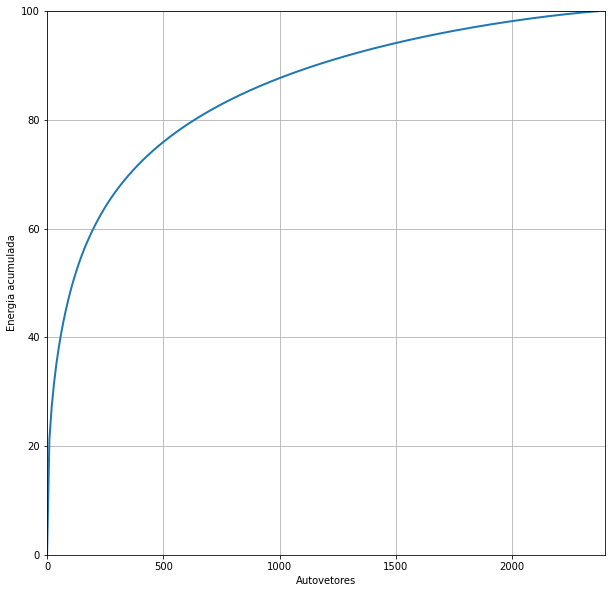

In [39]:
plt.figure(figsize=(10,10))
plt.plot(x,y,linewidth=2.0,ms=10.0)
plt.grid()
plt.ylabel("Energia acumulada")
plt.xlabel("Autovetores")
plt.axis([0,2400,0,100])
plt.show()